In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/4.Multi linear Regression/ToyotaCorolla.csv", 
                 encoding= 'unicode_escape')

In [7]:
df1 = df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
#Correlation matrix to identify auto correlation
df1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [11]:
import seaborn as sns
# sns.pairplot(df1)
# plt.show()

In [10]:
#regression model - without treating autocorrelation
import statsmodels.formula.api as smf

first_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df1).fit()
print(first_model.summary())
first_model_pred = first_model.predict(df1)
first_model_error = first_model_pred - df1.Price
first_model_RMSE  = np.sqrt(np.mean(first_model_error*first_model_error))
first_model_Rsquare = first_model.rsquared

print('First Model:  ','RMSE:',first_model_RMSE,'RSquare:',first_model_Rsquare)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:00:05   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949

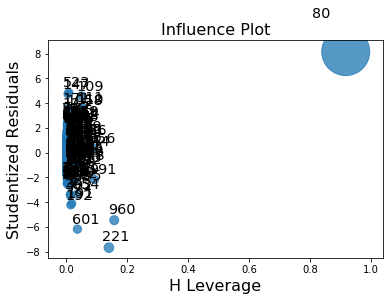

In [12]:
# P value of doors = 0.968 & CC is 0.179 which is not acceptable hence we need to check and drop rows or columns

# influence plot to check the rows causing error

import statsmodels.api as sm
sm.graphics.influence_plot(first_model)
plt.show()

In [13]:
# based on influence plot we will drop row = 80
# print(df1.iloc[[80]]) # Clearly CC value= 16,000  is completely differnt rest of the rows

df2=df1.drop(df1.index[[80]])

In [14]:
# Second model - after dropping rows

second_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df2).fit()
print(second_model.summary())

second_model_pred = second_model.predict(df2)
second_model_error = second_model_pred - df2.Price
second_model_RMSE = np.sqrt(np.mean(second_model_error*second_model_error))
second_model_RSquare = second_model.rsquared

print('Second Model:  ','RMSE:',second_model_RMSE,'RSquare:',second_model_RSquare)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:02:07   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545

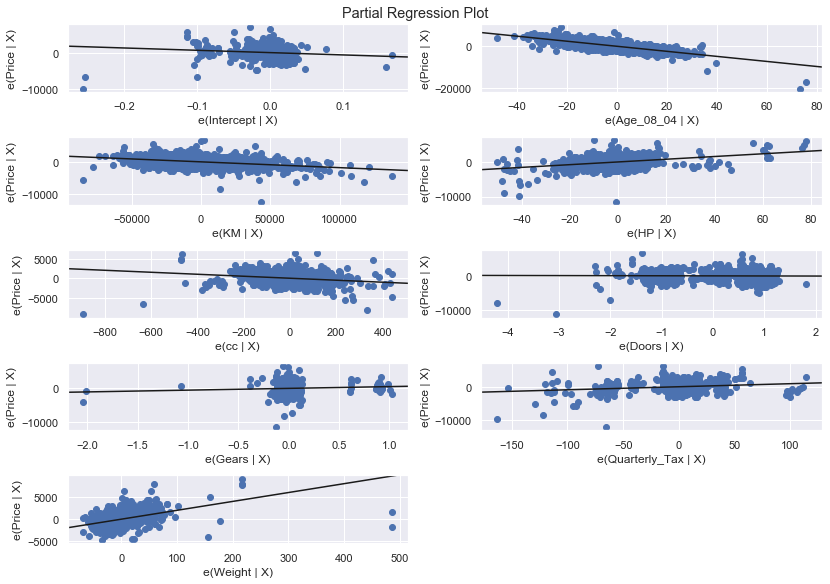

In [15]:
# P value of doors = 0.488 which is not acceptable

# Plot partial regression plot for identifying impact of each features 
sm.graphics.plot_partregress_grid(second_model)
sns.set(rc={'figure.figsize':(12,8)})
plt.show()


In [15]:
#Model 3 -  Dropping column ='Doors'

# Based on partial regression plot and P value from second_model, we shall drop column ='Doors'

Final_Model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df2).fit()
print(Final_Model.summary())

Final_Model_pred = Final_Model.predict(df2)
Final_Model_error = Final_Model_pred - df2.Price
Final_Model_RMSE = np.sqrt(np.mean(Final_Model_error*Final_Model_error))
Final_Model_RSquare = Final_Model.rsquared

print('Final Model:  ','RMSE:',Final_Model_RMSE,'RSquare:',Final_Model_RSquare)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        20:03:27   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569

In [16]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(df2[['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight']],df2.Price)

print("Coefficent M: ",reg.coef_)
print("intercept 'B': ",reg.intercept_)

flag=True
while(flag):
    a = int(input("Age_in_Month: "))
    b = int(input("Km: "))
    c = int(input("Horse Power: "))
    d = int(input("Engine cc: "))
    e = int(input("No of Gears: "))
    f = int(input("Quarterly_Tax: "))
    g = int(input("Weight: "))
    myoutput = reg.predict([[a,b,c,d,e,f,g]])
    print("Price: ",myoutput)
    flag = int(input("press 1 to continue or Press 0 to exit : "))

Coefficent M:  [-1.20457695e+02 -1.78938100e-02  3.91592545e+01 -2.50687432e+00
  5.49731101e+02  9.07593019e+00  1.99622726e+01]
intercept 'B':  -6313.9396211218245
Age_in_Month: 10
Km: 20000
Horse Power: 200
Engine cc: 2000
No of Gears: 6
Quarterly_Tax: 200
Weight: 1000
Price:  [20017.55469126]
press 1 to continue or Press 0 to exit : 0
